# Task 1 : Small Graph

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.linalg import eigh
AdjMatrix = np.array([[0, 1, 1, 0],
[1, 0, 0, 1],
[1, 0, 0, 1],
[0, 1, 1, 0]])
print("Adjacency Matrix:")
print(AdjMatrix)

Adjacency Matrix:
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


# Step 2 : Row Sums

In [ ]:
RowSums = np.sum(AdjMatrix, axis=1)
print("\nRow Sums:")
print(RowSums)


Row Sums:
[2 2 2 2]


# Step 3 : Laplace Graph

In [ ]:
LaplaceGraph = np.diag(RowSums) - AdjMatrix
print("\nLaplacian Matrix:")
print(LaplaceGraph)

test_vector = np.ones(len(LaplaceGraph))
singularity_check = LaplaceGraph @ test_vector
print("\nSingularity Check (Laplacian * ones):")
print(singularity_check)


Laplacian Matrix:
[[ 2 -1 -1  0]
 [-1  2  0 -1]
 [-1  0  2 -1]
 [ 0 -1 -1  2]]

Singularity Check (Laplacian * ones):
[0. 0. 0. 0.]


# Step 4 : Eigen Values and Eigen Vectors

In [ ]:
D, V = np.linalg.eig(LaplaceGraph)

# Step 5 : View Elements of Matrices

In [ ]:
d, ind = np.argsort(D), np.argsort(D)
D = np.diag(D[ind])
V = V[:, ind]
print("\nEigenvalues (sorted):")
print(np.diag(D))

print("\nEigenvectors (sorted):")
print(V)


Eigenvalues (sorted):
[-2.22044605e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]

Eigenvectors (sorted):
[[ 5.00000000e-01  4.08248290e-01  7.07106781e-01 -5.00000000e-01]
 [ 5.00000000e-01 -5.77350269e-01  4.80181756e-16  5.00000000e-01]
 [ 5.00000000e-01  5.77350269e-01 -1.77321568e-16  5.00000000e-01]
 [ 5.00000000e-01 -4.08248290e-01 -7.07106781e-01 -5.00000000e-01]]


# Step 6 : Smalles Eigen Value and its Corresponding Vector

In [ ]:
second_smallest_eigenvalue = D[1, 1]
V2 = V[:, 1]

if V2[0] < 0:
  V2 = -V2
print("\nSecond Smallest Eigenvalue:")
print(second_smallest_eigenvalue)

print("\nEigenvector corresponding to the second smallest eigenvalue (V2):")
print(V2)


Second Smallest Eigenvalue:
1.9999999999999991

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 0.40824829 -0.57735027  0.57735027 -0.40824829]


# Step 7 : Separate Elements of V2


Positive Indices (V2 > 0):
[0, 2]

Negative Indices (V2 <= 0):
[1, 3]


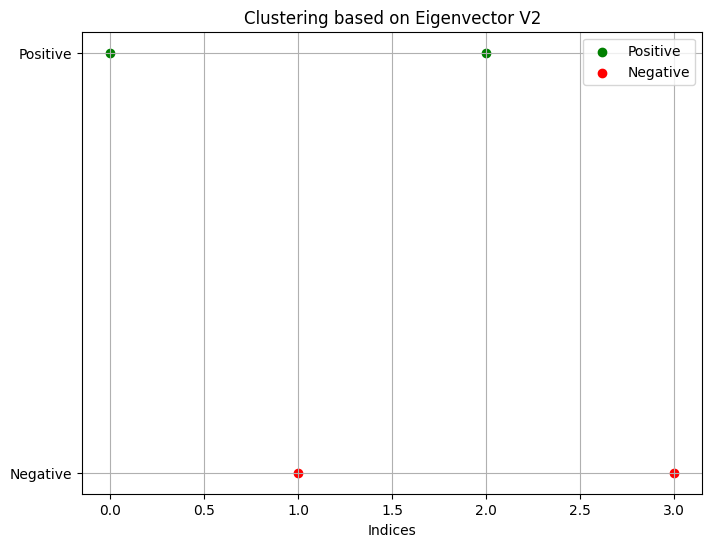

In [ ]:
pos = []
neg = []
for j in range(len(V2)):
  if V2[j] > 0:
    pos.append(j)
  else:
    neg.append(j)
print("\nPositive Indices (V2 > 0):")
print(pos)
print("\nNegative Indices (V2 <= 0):")
print(neg)

plt.figure(figsize=(8, 6))
plt.scatter(pos, [1]*len(pos), color='green', label='Positive')
plt.scatter(neg, [0]*len(neg), color='red', label='Negative')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.title('Clustering based on Eigenvector V2')
plt.xlabel('Indices')
plt.legend()
plt.grid()
plt.show()

# Step 8 : Load the Data

Loaded Social adjacency matrix with shape: (351, 351)


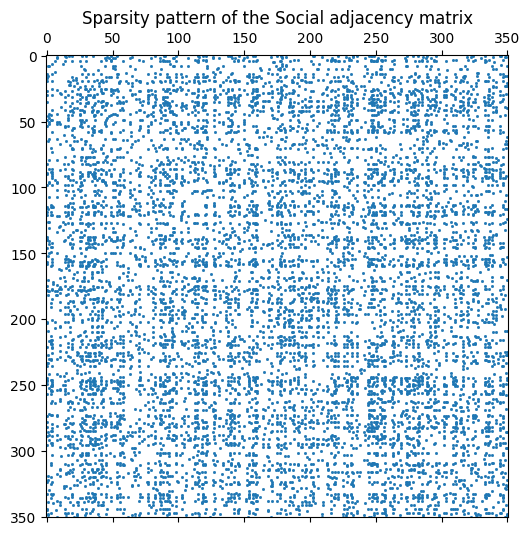

In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

data = loadmat("social.mat")
Social = data['Social']
print("Loaded Social adjacency matrix with shape:", Social.shape)

plt.figure(figsize=(8, 6))
plt.spy(Social, markersize=1)
plt.title('Sparsity pattern of the Social adjacency matrix')
plt.show()

# Step 9 : Diagonal and Laplace of Social

In [5]:
import numpy as np

DiagSocial = np.sum(Social, axis=1)
LaplaceSocial = np.diagflat(DiagSocial) - Social
print("\nDiagonal matrix DiagSocial:")
print(DiagSocial)
print("\nLaplacian matrix LaplaceSocial:")
print(LaplaceSocial)


Diagonal matrix DiagSocial:
[42 19 25 36 50  5  7  2 29  5 28  5  4  8 38 17 47  4 29 49 28 17  7 23
  8 43 25 48 30 20 43 47  6 39 34 46 40 50 27 32 15 46 33 31 24 42 10  8
  6 44 26  5 24 47  6 24 50  7 56 11  4  4 15 24  9 21  7 22 23  5 40 36
  8  5  9  4  4 45  4 23  5 35 46  9  8  7 56 34 49  9 48 42  6 44 33 34
 29 24 50  4  8  4 21 43 28  6 21 26  5  8 23  3 27 51 42 48 18  7 31 50
 46 45 25  4  4  7 22 52 41  4  5 24 16  8 20  3 34  4 46 46 43 27 43 32
  4 42 42  4  5  4 26  7 20  7 51 26 32 48 42 55 48  6  6  7 28  6  7  4
 29 33 19 39  4  6  6 47 32 45 45 22 30 39 19  5 27 44 30 34 43  5  5 48
 19 26 35  7 50 31  6 31  6 34 51  7  6 29 32  5  4 18 29  4  5 38 32 11
 43 24 46 54 34 48  6  5  5 18 49 14 47 22 28 46 46 22  6  7 45  5  5  6
  6 16 23  6 41 43 49 50 40 48 41 44 23 31 27 40 46 52  5  5  5 27 25 44
 47  6  4 36 16 43  8  5  7 44 55 41  3 29 50 34 39 25 44 50  8 47 19  6
 21 46 40 34 22  6 48 28 41 29 18  3  5  6 52 44  8  6  5 18  6 42 44 45
  8  6 25 33 51 20  5 

# Step 10 : Eigenvalues and Eigenvectors of Social

In [6]:
D, V = np.linalg.eig(LaplaceSocial)
print("\nEigenvalues (D):")
print(D)
print("\nEigenvectors (V):")
print(V)

print("Shape of V (eigenvectors):", V.shape)
print("Shape of D (eigenvalues):", D.shape)

ind = np.argsort(D)
D = np.diag(D[ind])
V = V[:, ind]

print("\nEigenvalues (sorted):")
print(np.diag(D))
print("\nEigenvectors (sorted):")
print(V)


Eigenvalues (D):
[ 7.83726185e+20  4.69452742e+20  3.60858037e+20  2.63133350e+20
  1.80362825e+20 -1.96859959e+20  1.70182927e+20  1.67965098e+20
  1.65739742e+20  1.64450621e+20 -1.92103673e+20  1.53891311e+20
  1.47636037e+20  1.43213235e+20 -1.78690854e+20 -1.77812416e+20
 -1.70974312e+20 -1.68924373e+20 -1.66323610e+20 -1.60434460e+20
 -1.58764568e+20 -1.48395654e+20 -1.50733606e+20 -1.54346568e+20
 -1.54664298e+20  1.40489284e+20  1.38083299e+20  1.38683216e+20
  1.34602091e+20  1.31062981e+20  1.30358148e+20  1.25564038e+20
  1.23581014e+20  1.22794790e+20  1.18005302e+20  1.16908138e+20
  1.14938035e+20 -1.45802342e+20 -1.42473976e+20 -1.41051479e+20
 -1.39759708e+20 -1.36067037e+20 -1.32989250e+20 -1.30627279e+20
 -1.29622346e+20 -1.27772261e+20 -1.26506545e+20 -1.25359620e+20
 -1.24385691e+20 -1.22476777e+20 -1.21961380e+20 -1.19310553e+20
 -1.17555657e+20 -1.16676622e+20  1.12100301e+20  1.11356675e+20
  1.10547598e+20  1.07829813e+20  1.06299208e+20  1.05052168e+20
  1.041

# Step 11 : Second Smallest Eigenvalue

In [8]:
second_smallest_eigenvalue = D[1, 1]
V2 = V[:, 1]

if V2[0] < 0:
    V2 = -V2

print("\nSecond Smallest Eigenvalue:")
print(second_smallest_eigenvalue)

print("\nEigenvector corresponding to the second smallest eigenvalue (V2):")
print(V2)

pos = []
neg = []

for j in range(len(V2)):
    if V2[j] > 0:
        pos.append(j)
    else:
        neg.append(j)

print("\nPositive Indices (V2 > 0):")
print(pos)

print("\nNegative Indices (V2 <= 0):")
print(neg)


Second Smallest Eigenvalue:
-1.9210367262365683e+20

Eigenvector corresponding to the second smallest eigenvalue (V2):
[ 2.86912150e-03  1.81178076e-03  5.50859041e-03  1.94676779e-02
 -1.28609860e-01 -9.93712863e-04  4.04850090e-03 -2.43664212e-03
  2.27856350e-04  6.24695444e-03 -8.61295843e-03  4.65089406e-03
 -9.71796814e-03 -1.49755986e-02  1.95976684e-02 -3.69606931e-02
  2.70444780e-02 -2.63507512e-03 -1.15876235e-02 -1.09542447e-01
  6.59081818e-03  9.70729699e-03  3.40228265e-03 -8.17489204e-03
  2.03402952e-02 -1.93658576e-01  2.65073994e-02 -3.40863035e-02
  6.09699580e-04  7.79758397e-03  8.93789592e-03  5.57428370e-02
 -6.87508378e-03  6.34498858e-02  3.06756112e-02 -1.23087227e-01
  8.71866326e-02 -9.60165834e-03  2.57189329e-02 -8.97965518e-03
  5.84041334e-03  2.18775298e-01 -1.31553641e-02 -3.53919789e-02
 -9.46004681e-03  2.92699243e-02  3.99098246e-03 -1.64232016e-02
 -1.89728721e-02 -1.39130382e-02 -1.41059580e-02  2.50180396e-02
  2.74526716e-03 -9.18624698e-03  2

# Step 12 : Adjacency Matrix of Social

In [9]:
order = pos + neg
m, n = Social.shape
iden = np.eye(m)

P = np.zeros((m, m))
for j in range(m):
  for k in range(m):
    P[j, k] = iden[order[j], k]

SocialOrdered = P @ Social @ P.T
print("Shape of SocialOrdered:", SocialOrdered.shape)

Shape of SocialOrdered: (351, 351)


# Step 13 : Plot Permutation Adjacency Matrix

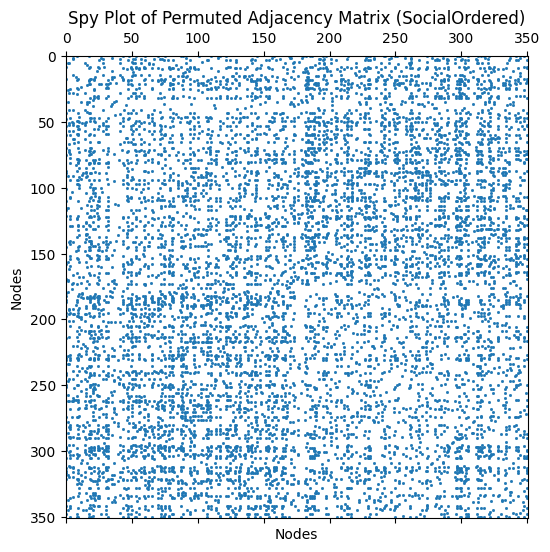

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.spy(SocialOrdered, markersize=1)
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)
plt.show()

# Step 14 : Clusters

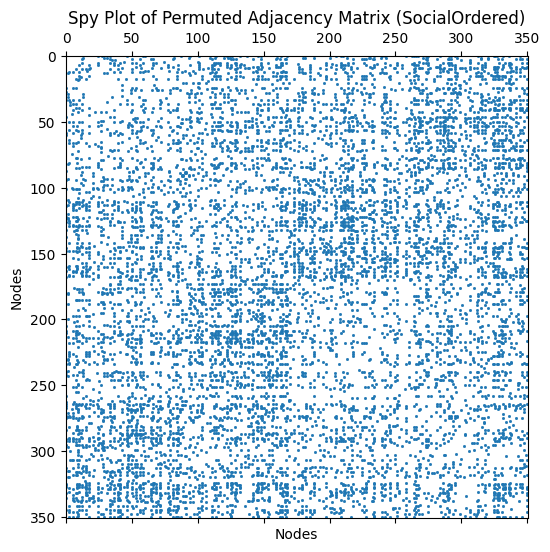

In [12]:
import numpy as np
import matplotlib.pyplot as plt

V3 = V[:, 2]
if V3[0] < 0:
    V3 = -V3

pp = []
pn = []
np_ = []
nn = []

for j in range(len(V2)):
    if V2[j] > 0:
        if V3[j] > 0:
            pp.append(j)
        else:
            pn.append(j)
    else:
        if V3[j] > 0:
            np_.append(j)
        else:
            nn.append(j)

order = pp + pn + np_ + nn

m = Social.shape[0]
iden = np.eye(m)
P = np.zeros((m, m))

for j in range(m):
    P[j, :] = iden[order[j], :]

SocialOrdered = P @ Social @ P.T

plt.figure(figsize=(8, 6))
plt.spy(SocialOrdered, markersize=1)
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrdered)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)
plt.show()

# Step 15 : Vector Procedure for Clusters

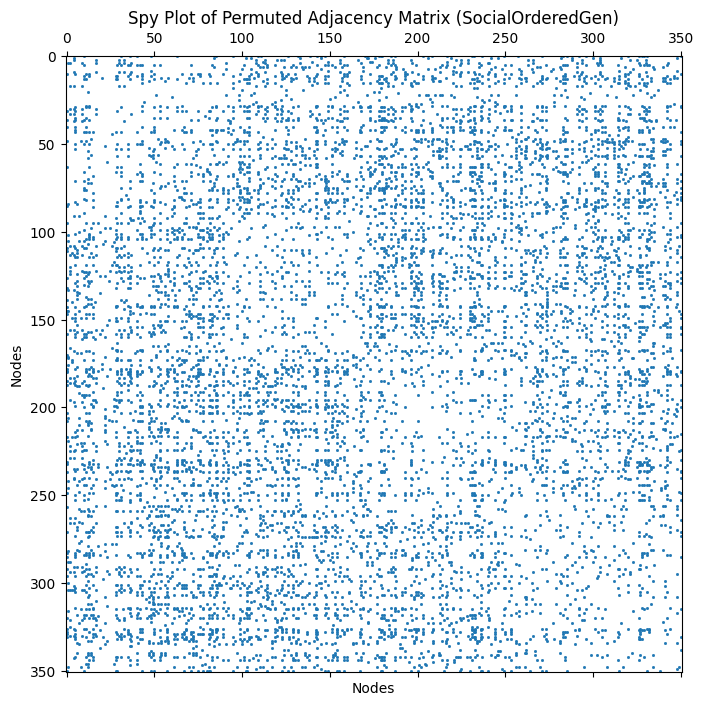

In [13]:
import numpy as np
import matplotlib.pyplot as plt

SocialPos = Social[np.ix_(pos, pos)]
SocialNeg = Social[np.ix_(neg, neg)]

rowsumpos = np.sum(SocialPos, axis=1)
DiagSocialPos = np.diag(rowsumpos)
LaplaceSocialPos = DiagSocialPos - SocialPos

DPos, VPos = np.linalg.eig(LaplaceSocialPos)
ind = np.argsort(DPos)
DPos = np.diag(DPos[ind])
VPos = VPos[:, ind]
V2Pos = VPos[:, 1]

posp = []
posn = []
for j in range(len(V2Pos)):
    if V2Pos[j] > 0:
        posp.append(pos[j])
    else:
        posn.append(pos[j])

rowsumneg = np.sum(SocialNeg, axis=1)
DiagSocialNeg = np.diag(rowsumneg)
LaplaceSocialNeg = DiagSocialNeg - SocialNeg

DNeg, VNeg = np.linalg.eig(LaplaceSocialNeg)
ind = np.argsort(DNeg)
DNeg = np.diag(DNeg[ind])
VNeg = VNeg[:, ind]
V2Neg = VNeg[:, 1]

negp = []
negn = []
for j in range(len(V2Neg)):
    if V2Neg[j] > 0:
        negp.append(neg[j])
    else:
        negn.append(neg[j])

ordergen = posp + posn + negp + negn

m = Social.shape[0]
iden = np.eye(m)
P = np.zeros((m, m))
for j in range(m):
    P[j, :] = iden[ordergen[j], :]

SocialOrderedGen = P @ Social @ P.T

plt.figure(figsize=(10, 8))
plt.spy(SocialOrderedGen, markersize=1)
plt.title("Spy Plot of Permuted Adjacency Matrix (SocialOrderedGen)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.grid(False)
plt.show()